# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



# TASK #1: PROJECT OVERVIEW 


![image.png](attachment:image.png)


![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES AND DATASET

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet



In [2]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from fbprophet import Prophet

In [0]:
# dataframes creation for both training and testing datasets 
avocado_df=pd.read_csv('avocado.csv')


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [5]:
# Let's view the head of the training dataset
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# Let's view the last elements in the training dataset
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# TASK #3: EXPLORE DATASET  

In [10]:
avocado_df.sort_values('Date')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


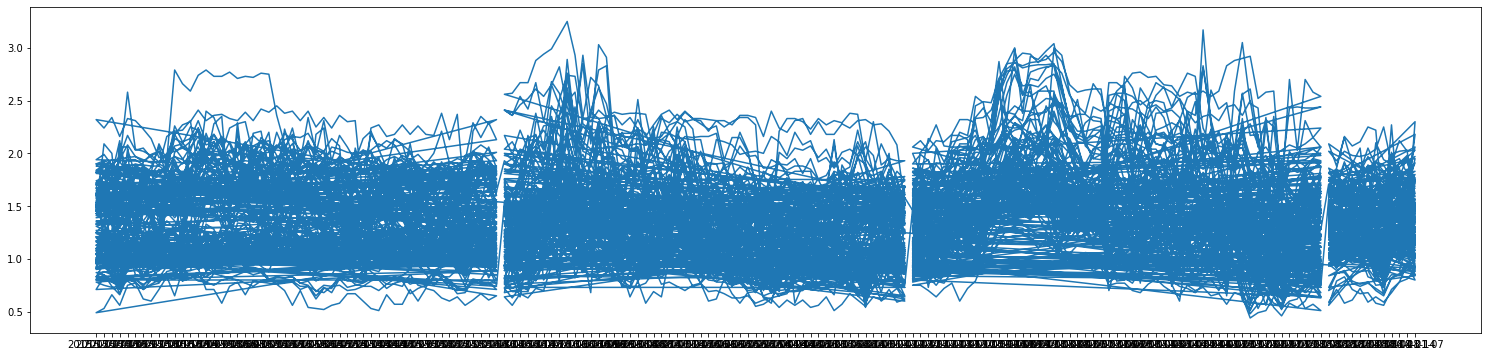

In [11]:
# Plot date and average price
plt.figure(figsize=(26,6))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])
#plt.xticks(rotation=45)

In [0]:
# Plot distribution of the average price


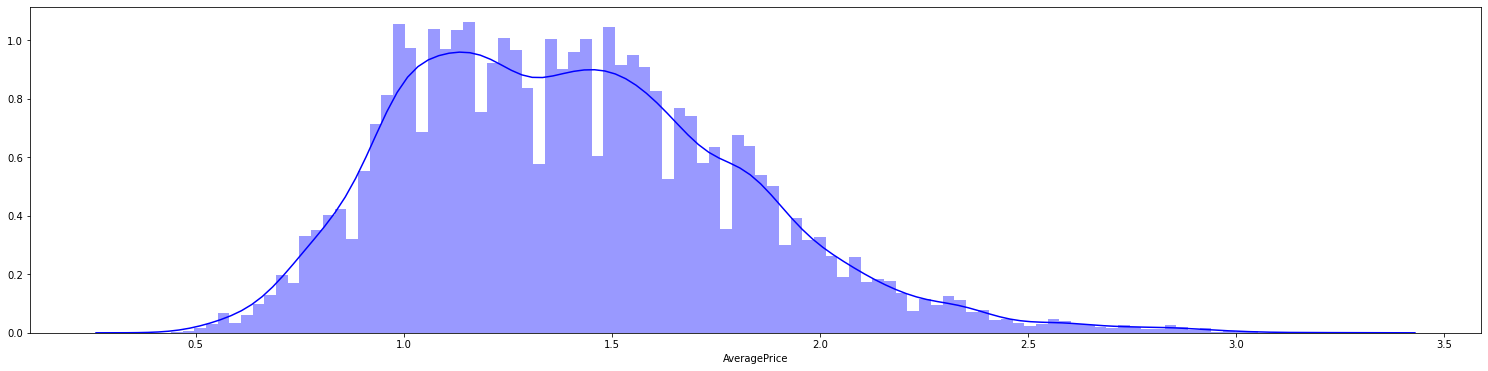

In [13]:
plt.figure(figsize=(26,6))
sns.distplot(avocado_df['AveragePrice'],color='b',bins=100)

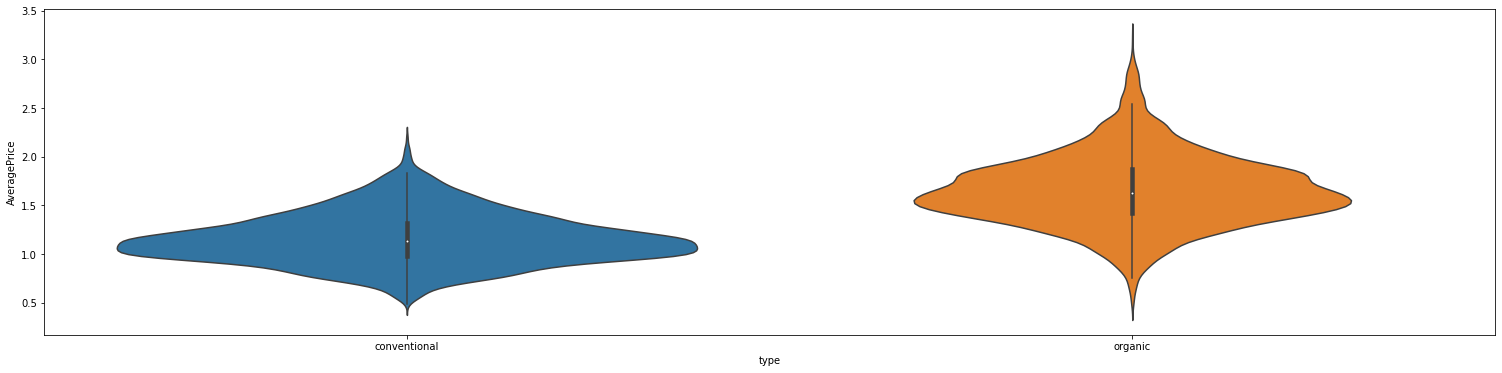

In [14]:
# Plot a violin plot of the average price vs. avocado type
plt.figure(figsize=(26,6))
sns.violinplot(y=avocado_df['AveragePrice'],x=avocado_df['type'],data=avocado_df)

In [15]:
avocado_df['region'].value_counts()

Syracuse               338
LasVegas               338
Nashville              338
Atlanta                338
Chicago                338
BuffaloRochester       338
NewYork                338
LosAngeles             338
Albany                 338
CincinnatiDayton       338
RaleighGreensboro      338
Philadelphia           338
NorthernNewEngland     338
RichmondNorfolk        338
Portland               338
BaltimoreWashington    338
Spokane                338
Midsouth               338
SouthCarolina          338
Sacramento             338
Roanoke                338
Indianapolis           338
Southeast              338
California             338
NewOrleansMobile       338
Houston                338
Boston                 338
Detroit                338
Tampa                  338
Northeast              338
Pittsburgh             338
TotalUS                338
Seattle                338
HarrisburgScranton     338
Orlando                338
SanFrancisco           338
Columbus               338
H

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

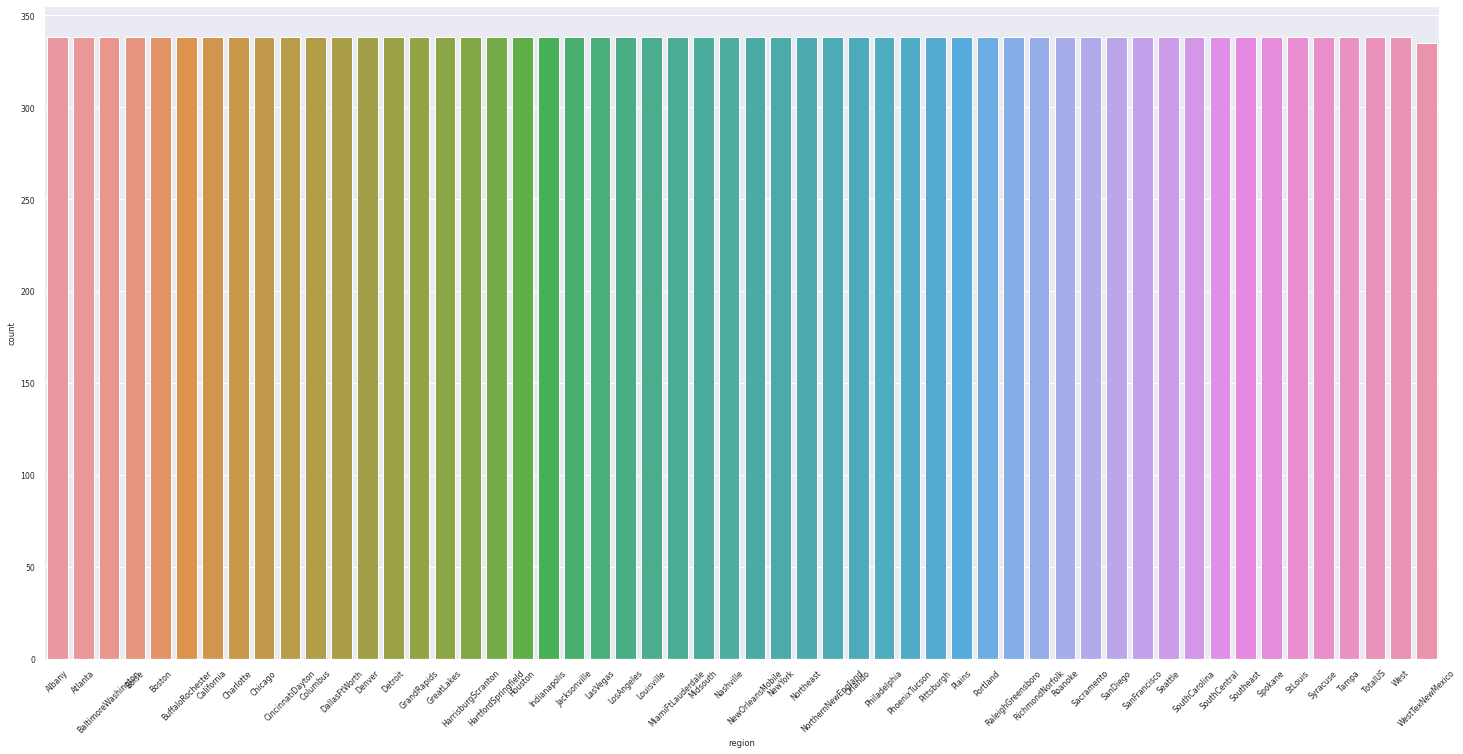

In [16]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

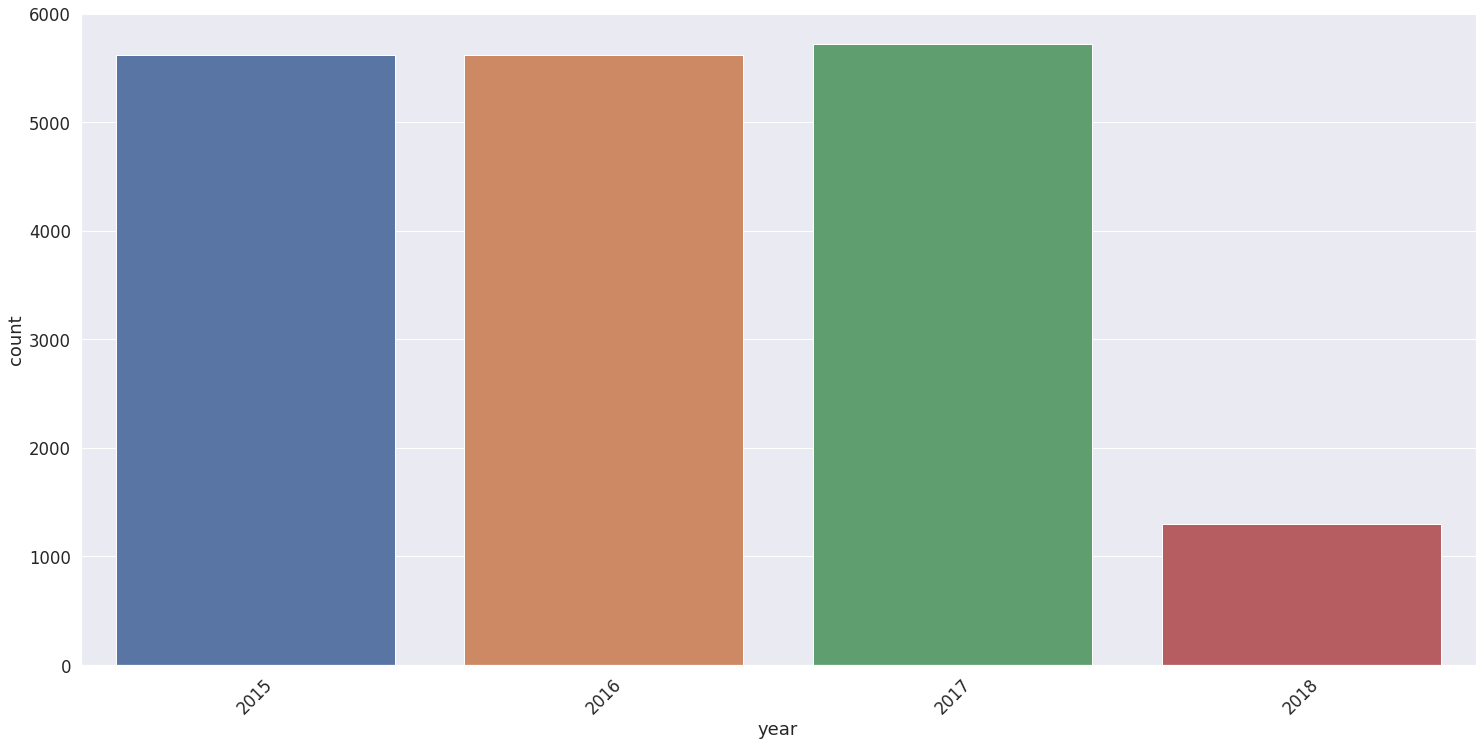

In [17]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

In [18]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

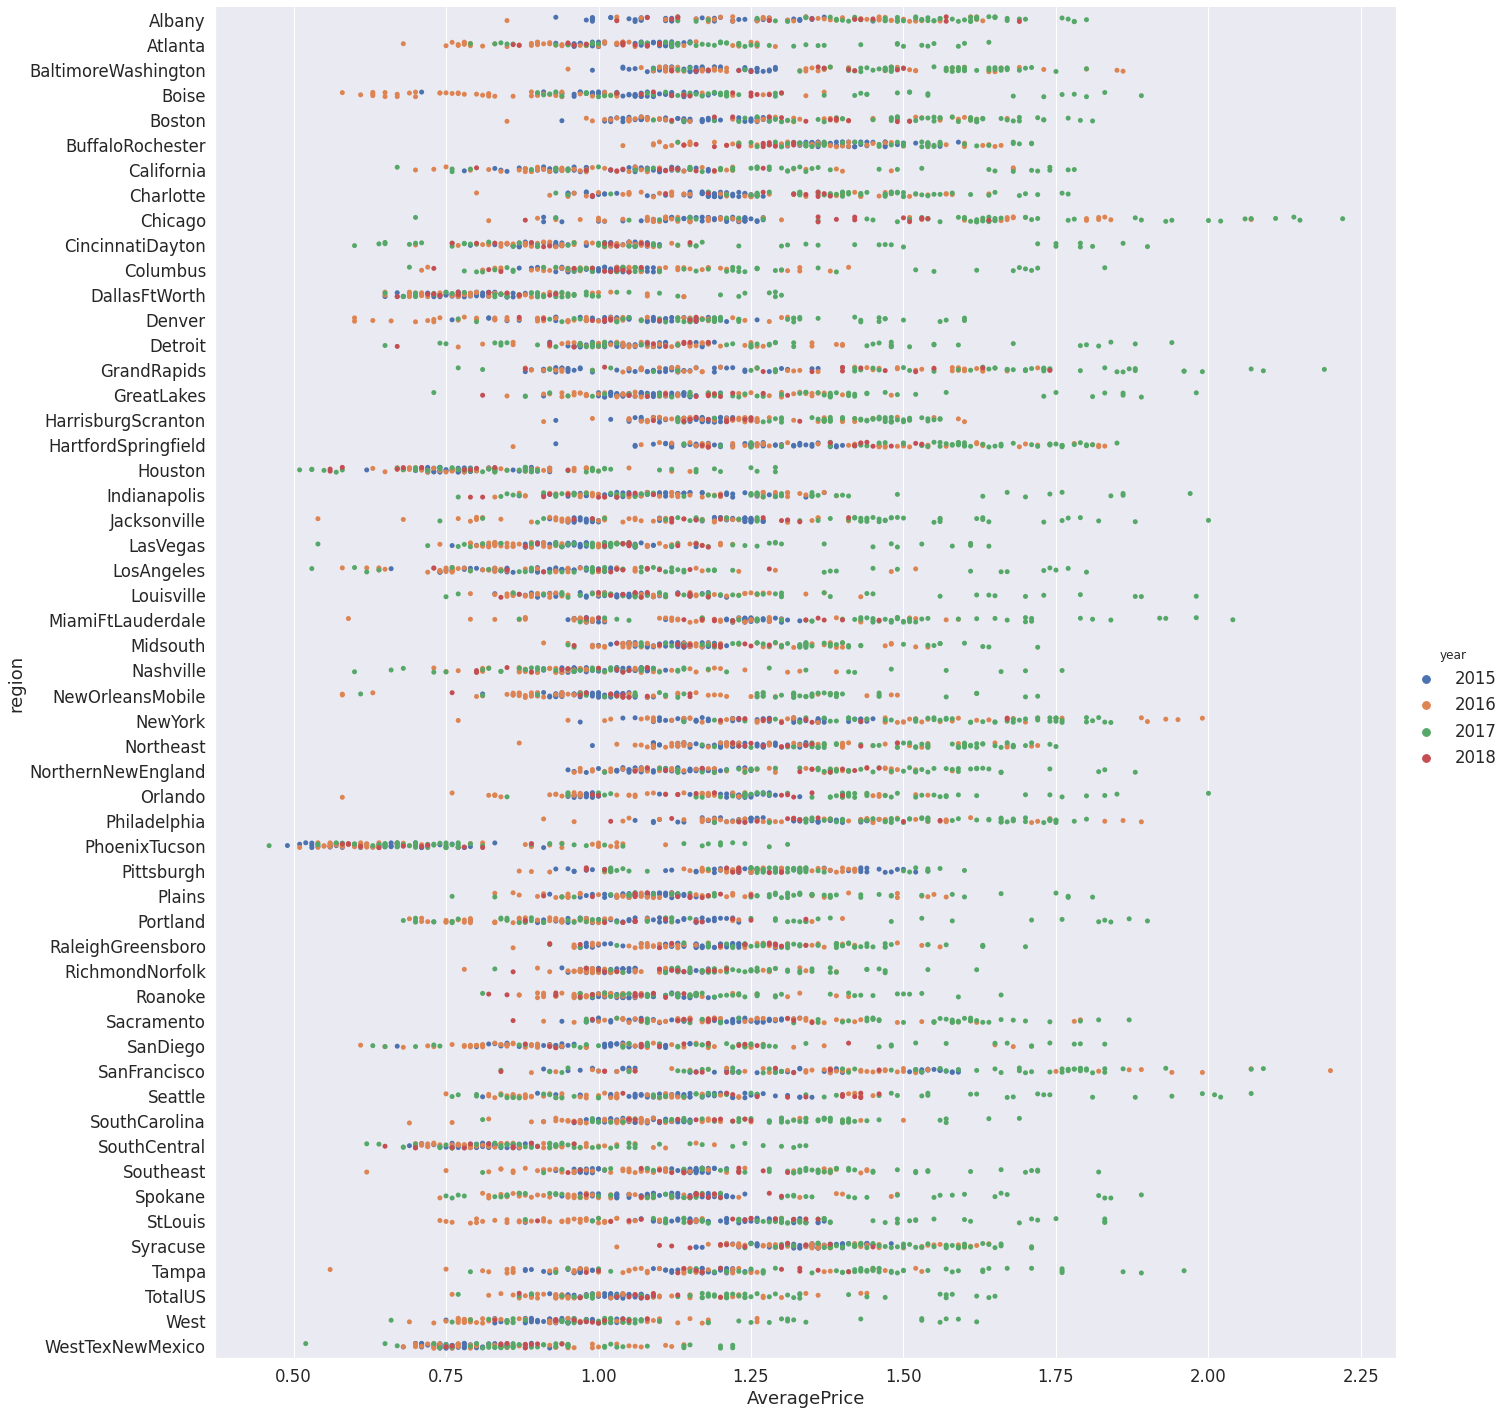

In [19]:
 # plot the avocado prices vs. regions for conventional avocados
conventional=sns.catplot('AveragePrice','region',data=avocado_df[avocado_df['type']=='conventional'],hue='year',height=20)

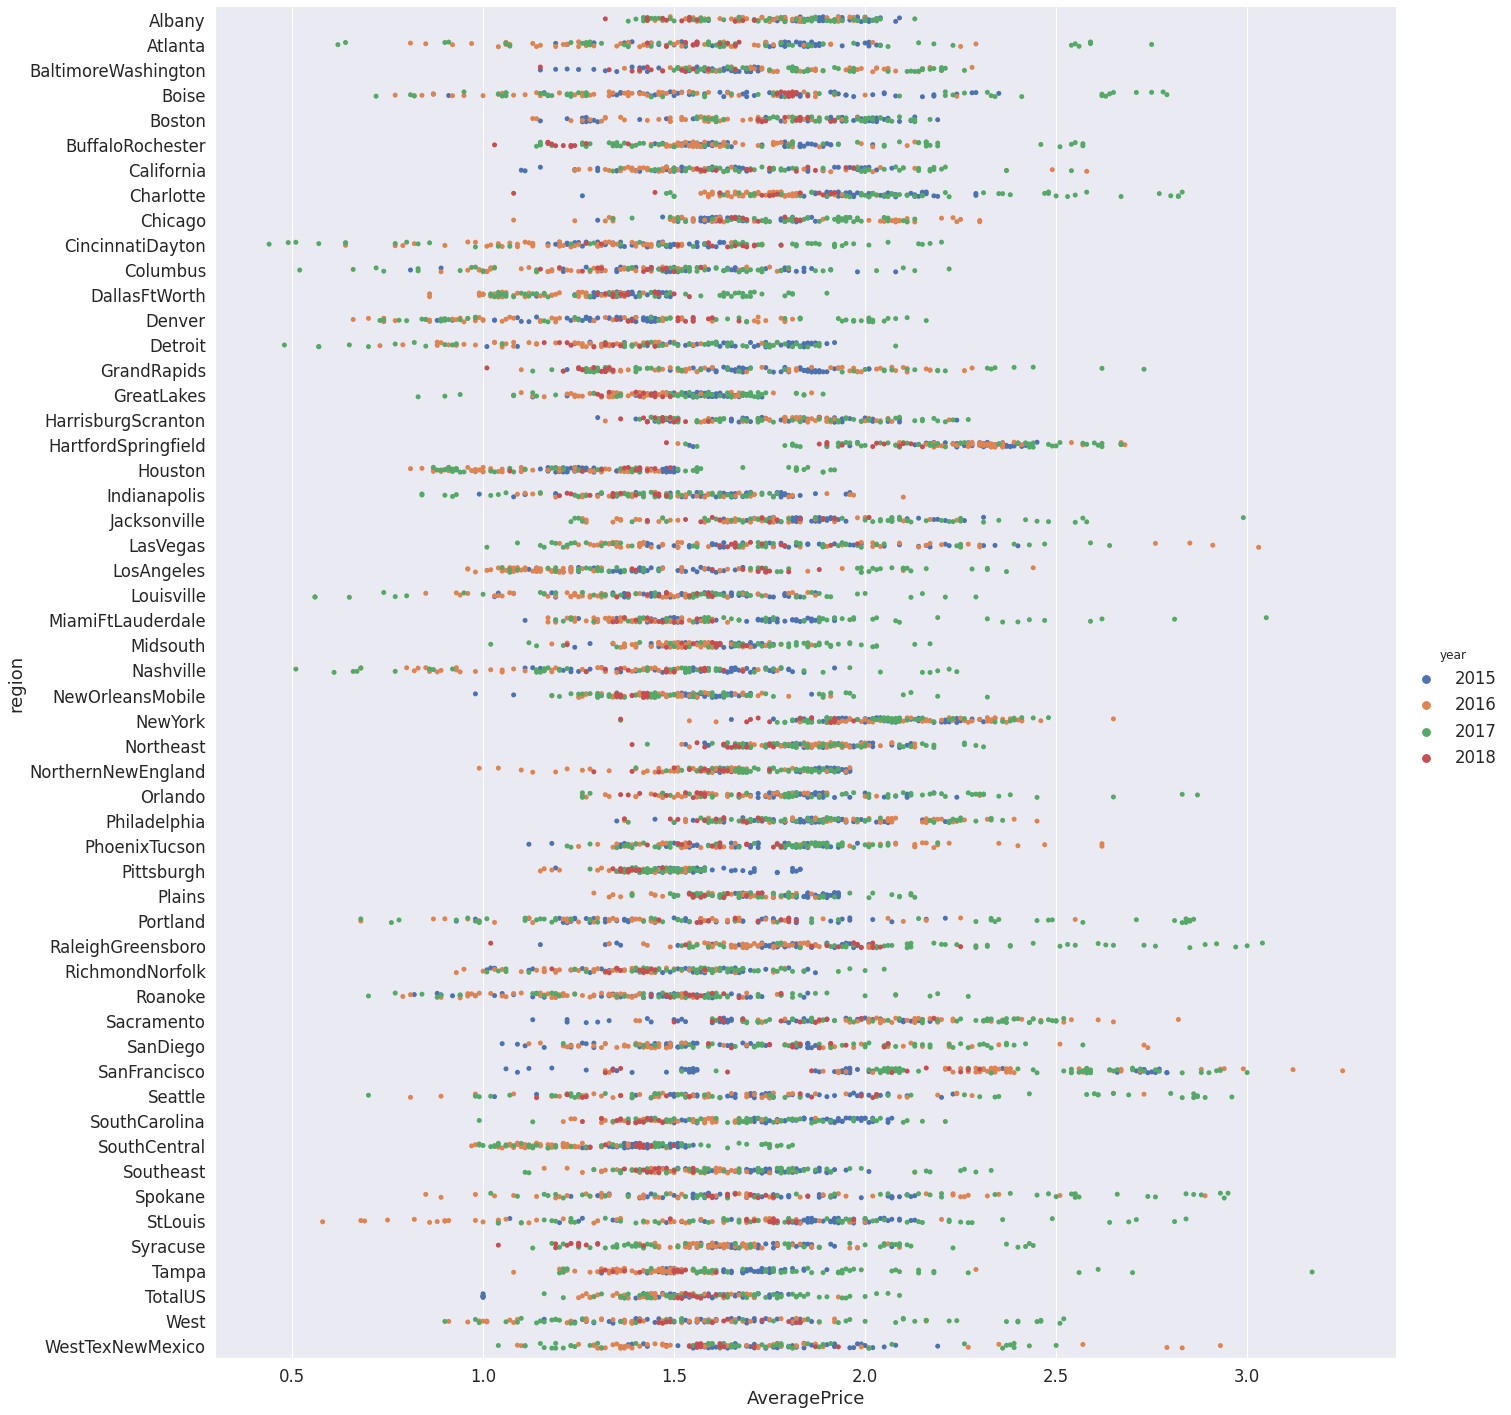

In [20]:
  # plot the avocado prices vs. regions for organic avocado
  avocado=sns.catplot('AveragePrice','region',data=avocado_df[avocado_df['type']=='organic'],hue='year',height=20)

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [21]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
avocado_prophet_df=avocado_df[['AveragePrice','Date']]

In [23]:
avocado_prophet_df.head()

,AveragePrice,Date
0,1.33,2015-12-27
1,1.35,2015-12-20
2,0.93,2015-12-13
3,1.08,2015-12-06
4,1.28,2015-11-29


In [0]:
avocado_prophet_df=avocado_prophet_df.rename(columns={'AveragePrice':'y','Date':'ds'})

In [25]:
avocado_prophet_df.head()

,y,ds
0,1.33,2015-12-27
1,1.35,2015-12-20
2,0.93,2015-12-13
3,1.08,2015-12-06
4,1.28,2015-11-29


# TASK 5: UNDERSTAND INTUITION BEHIND FACEBOOK PROPHET

*italicized text*![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [26]:
m=Prophet()
m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# Forcasting into the future
future=m.make_future_dataframe(periods=365,)
forecast=m.predict(future)

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499585,0.919249,1.887108,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
1,2015-01-04,1.499585,0.900337,1.916072,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
2,2015-01-04,1.499585,0.898859,1.882214,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
3,2015-01-04,1.499585,0.895899,1.858745,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
4,2015-01-04,1.499585,0.906272,1.882990,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.156579,0.541347,1.617141,0.955785,1.366841,-0.085825,-0.085825,-0.085825,-0.085825,-0.085825,-0.085825,0.0,0.0,0.0,1.070754
18610,2019-03-22,1.155832,0.520501,1.601829,0.953617,1.366822,-0.084051,-0.084051,-0.084051,-0.084051,-0.084051,-0.084051,0.0,0.0,0.0,1.071781
18611,2019-03-23,1.155084,0.534523,1.606476,0.951725,1.367220,-0.082002,-0.082002,-0.082002,-0.082002,-0.082002,-0.082002,0.0,0.0,0.0,1.073083
18612,2019-03-24,1.154337,0.552562,1.628945,0.950015,1.367971,-0.079697,-0.079697,-0.079697,-0.079697,-0.079697,-0.079697,0.0,0.0,0.0,1.074640


(array([735630., 735811., 735995., 736177., 736361., 736542., 736726.,
        736907., 737091.]), <a list of 9 Text major ticklabel objects>)

<Figure size 1872x432 with 0 Axes>

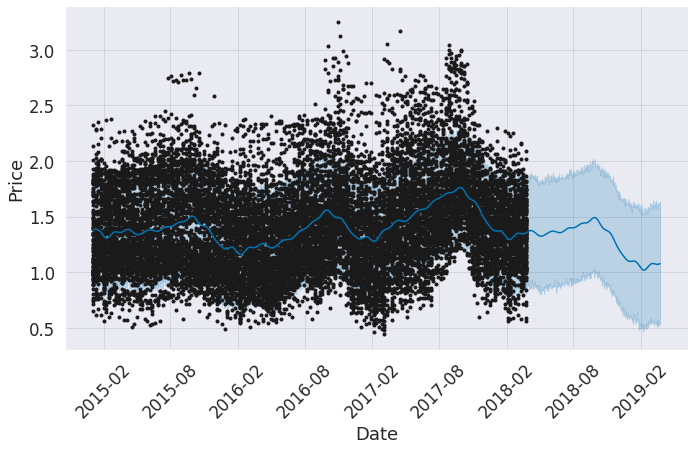

In [29]:
plt.figure(figsize=(26,6))
figure=m.plot(forecast,xlabel='Date',ylabel='Price')
plt.xticks(rotation=45)

(array([736330., 736389., 736450., 736511., 736573., 736634., 736695.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 1872x432 with 0 Axes>

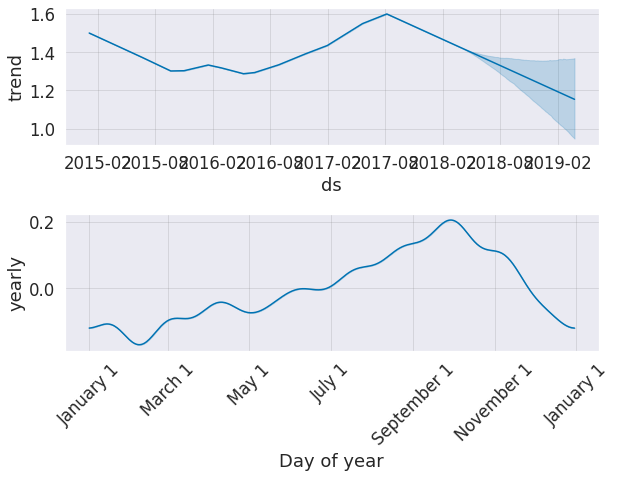

In [30]:
#If you want to see the forecast components, you can use the Prophet.plot_components method. 
#By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
plt.figure(figsize=(26,6))
figure2=m.plot_components(forecast)
plt.xticks(rotation=45)

# TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [0]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


In [0]:
# Select specific region
avocado_df_sample=avocado_df[avocado_df['region']=='west']

In [0]:
avocado_df_sample=avocado_df_sample.sort_values('Date')

In [37]:
avocado_df_sample.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 7 Text major ticklabel objects>)

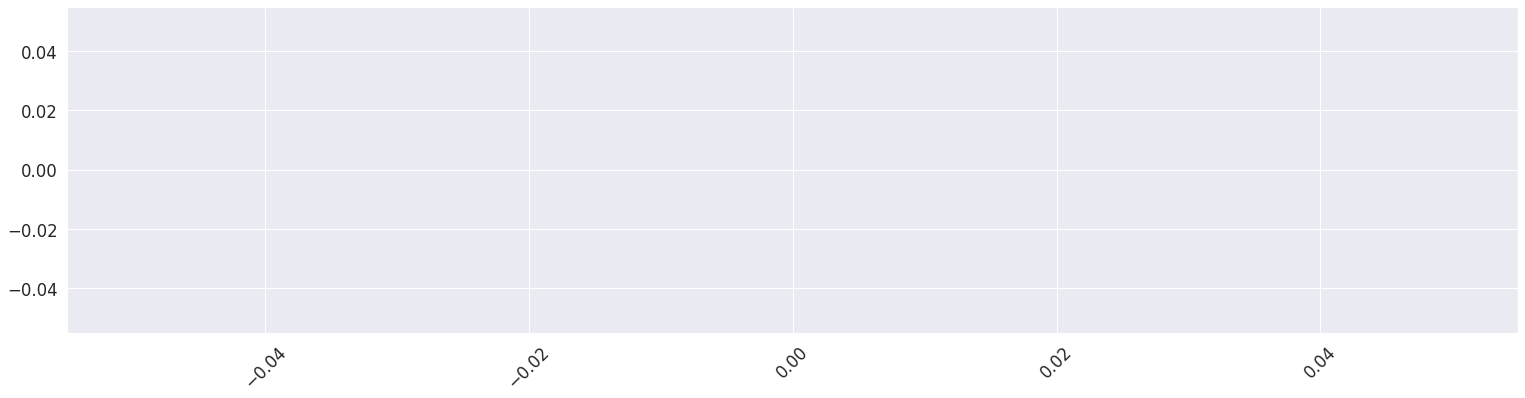

In [38]:
plt.figure(figsize=(26,6))

plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])
plt.xticks(rotation=45)

In [0]:
avocado_df_sample=avocado_df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [45]:
avocado_df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      int64  
 1   ds            0 non-null      object 
 2   y             0 non-null      float64
 3   Total Volume  0 non-null      float64
 4   4046          0 non-null      float64
 5   4225          0 non-null      float64
 6   4770          0 non-null      float64
 7   Total Bags    0 non-null      float64
 8   Small Bags    0 non-null      float64
 9   Large Bags    0 non-null      float64
 10  XLarge Bags   0 non-null      float64
 11  type          0 non-null      object 
 12  year          0 non-null      int64  
 13  region        0 non-null      object 
dtypes: float64(9), int64(2), object(3)
memory usage: 0.0+ bytes


In [46]:
avocado_df_sample.isnull().sum()

Unnamed: 0      0
ds              0
y               0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [0]:
#avocado_df_sample=avocado_df_sample.rename(columns={'AveragePrice':'y','Date':'ds'})

In [0]:
m = Prophet()


In [54]:
m.fit(avocado_df_sample)


ValueError: ignored

In [0]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [0]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

In [0]:
figure3 = m.plot_components(forecast)

In [55]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()
avocado_df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# GREAT JOB!